In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
X,y=make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10, random_state=42,n_classes=2)
df=pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])])
df['target']=y
df

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,target
0,-0.496932,-0.339122,0.229146,-0.182569,-1.041103,0.421546,-1.015179,0.767666,-1.633819,-0.453981,...,0.123134,0.977832,0.370061,0.266818,0.153306,-0.320119,-1.179273,0.457806,0.356006,0
1,0.012499,1.007444,0.140096,2.868403,-2.123507,-1.280456,-1.323388,1.420631,-2.725525,-1.325920,...,-0.054783,1.852633,-1.254923,0.189480,0.277478,-0.199386,-1.763853,0.937916,0.459363,0
2,-0.720212,-1.244486,-0.472291,-1.125655,-0.729670,1.010840,0.733484,0.257335,0.028566,-1.091580,...,-0.505305,0.411076,0.449827,3.529055,0.039350,0.652697,0.413948,-0.538790,-0.266361,0
3,-0.697364,-0.082698,-0.512911,1.138150,2.297500,-2.072355,2.256809,-1.697290,3.618918,0.993004,...,-0.278493,-2.161010,1.136191,0.154032,-0.339092,0.716461,2.616592,1.334229,-0.791529,1
4,-0.202339,-1.553035,-0.090793,-0.183245,0.664007,-0.326614,0.521091,-0.465061,0.939386,0.357189,...,-0.026790,-0.599667,-1.403559,1.985380,-0.091821,0.127459,0.643637,2.254038,-0.181938,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.324340,0.145836,0.369973,-0.532725,0.629300,-0.686279,-0.547309,-0.238503,0.044630,0.895783,...,0.400882,-0.370716,0.585299,-1.432671,-0.037956,-0.511153,-0.283798,0.819925,0.199276,1
996,-1.375634,0.474633,-1.384341,-0.473645,-1.028312,-0.455467,2.674701,0.043886,1.373125,-2.416668,...,-1.383980,0.267867,0.707592,0.244957,-0.021879,1.915874,1.992108,0.408136,-0.961234,0
997,1.010275,-0.130926,1.180304,-0.044361,0.461680,-0.176112,-2.476632,0.228120,-1.652703,1.767843,...,1.143690,0.121871,1.128240,0.082987,0.069945,-1.634519,-1.989591,-0.805800,0.887026,1
998,-1.207759,-0.380763,0.129067,0.809113,-0.747561,-0.698262,-0.647964,0.535489,-1.107383,-0.369325,...,0.055260,0.686759,-1.269465,0.124176,0.106264,-0.180706,-0.777253,0.599103,0.226718,0


In [3]:
def rowsample(data,percent):
    return data.sample(frac=percent, replace=True, random_state=42)


In [4]:
def colsample(data,percent):
    cols = data.columns[:-1]  # Exclude the target column
    sampled_cols = np.random.choice(cols, size=int(len(cols) * percent), replace=False)
    return data[sampled_cols.tolist() + ['target']]

In [5]:
def combined_sampling(df,row_percent,col_percent):
  new_df = rowsample(df,row_percent)
  return colsample(new_df,col_percent)

In [6]:
df1 = rowsample(df,0.8)
df2=rowsample(df,0.8)
df3=colsample(df,0.8)

In [7]:
from sklearn.tree import DecisionTreeClassifier
dt1=DecisionTreeClassifier()
dt2=DecisionTreeClassifier()
dt3=DecisionTreeClassifier()


In [8]:
dt1.fit(df1.iloc[:,:-1],df1.iloc[:,-1])
dt2.fit(df2.iloc[:,:-1],df2.iloc[:,-1])
dt3.fit(df3.iloc[:,:-1],df3.iloc[:,-1])

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [9]:
test1=np.array(df.iloc[1,:-1]).reshape(1,20)
test1

array([[ 0.01249932,  1.00744397,  0.14009566,  2.86840306, -2.12350652,
        -1.28045557, -1.32338835,  1.42063115, -2.72552533, -1.3259201 ,
         0.18471047, -0.05478323,  1.85263278, -1.25492267,  0.18947982,
         0.27747834, -0.19938562, -1.76385344,  0.93791554,  0.45936344]])

In [10]:
dt1.predict(test1)

C:\Users\far\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [11]:
dt2.predict(test1)

C:\Users\far\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [12]:
dt2.predict(test1)

C:\Users\far\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

[Text(0.609375, 0.9545454545454546, 'x[4] <= -0.058\ngini = 0.5\nsamples = 800\nvalue = [390.0, 410.0]'),
 Text(0.359375, 0.8636363636363636, 'x[16] <= -0.48\ngini = 0.249\nsamples = 418\nvalue = [357.0, 61.0]'),
 Text(0.484375, 0.9090909090909092, 'True  '),
 Text(0.3385416666666667, 0.7727272727272727, 'gini = 0.0\nsamples = 12\nvalue = [0, 12]'),
 Text(0.3802083333333333, 0.7727272727272727, 'x[4] <= -0.432\ngini = 0.212\nsamples = 406\nvalue = [357, 49]'),
 Text(0.19791666666666666, 0.6818181818181818, 'x[1] <= -1.481\ngini = 0.119\nsamples = 345\nvalue = [323, 22]'),
 Text(0.08333333333333333, 0.5909090909090909, 'x[2] <= 0.241\ngini = 0.386\nsamples = 23\nvalue = [17, 6]'),
 Text(0.041666666666666664, 0.5, 'x[0] <= 1.073\ngini = 0.111\nsamples = 17\nvalue = [16, 1]'),
 Text(0.020833333333333332, 0.4090909090909091, 'gini = 0.0\nsamples = 15\nvalue = [15, 0]'),
 Text(0.0625, 0.4090909090909091, 'x[6] <= 1.754\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.041666666666666664, 

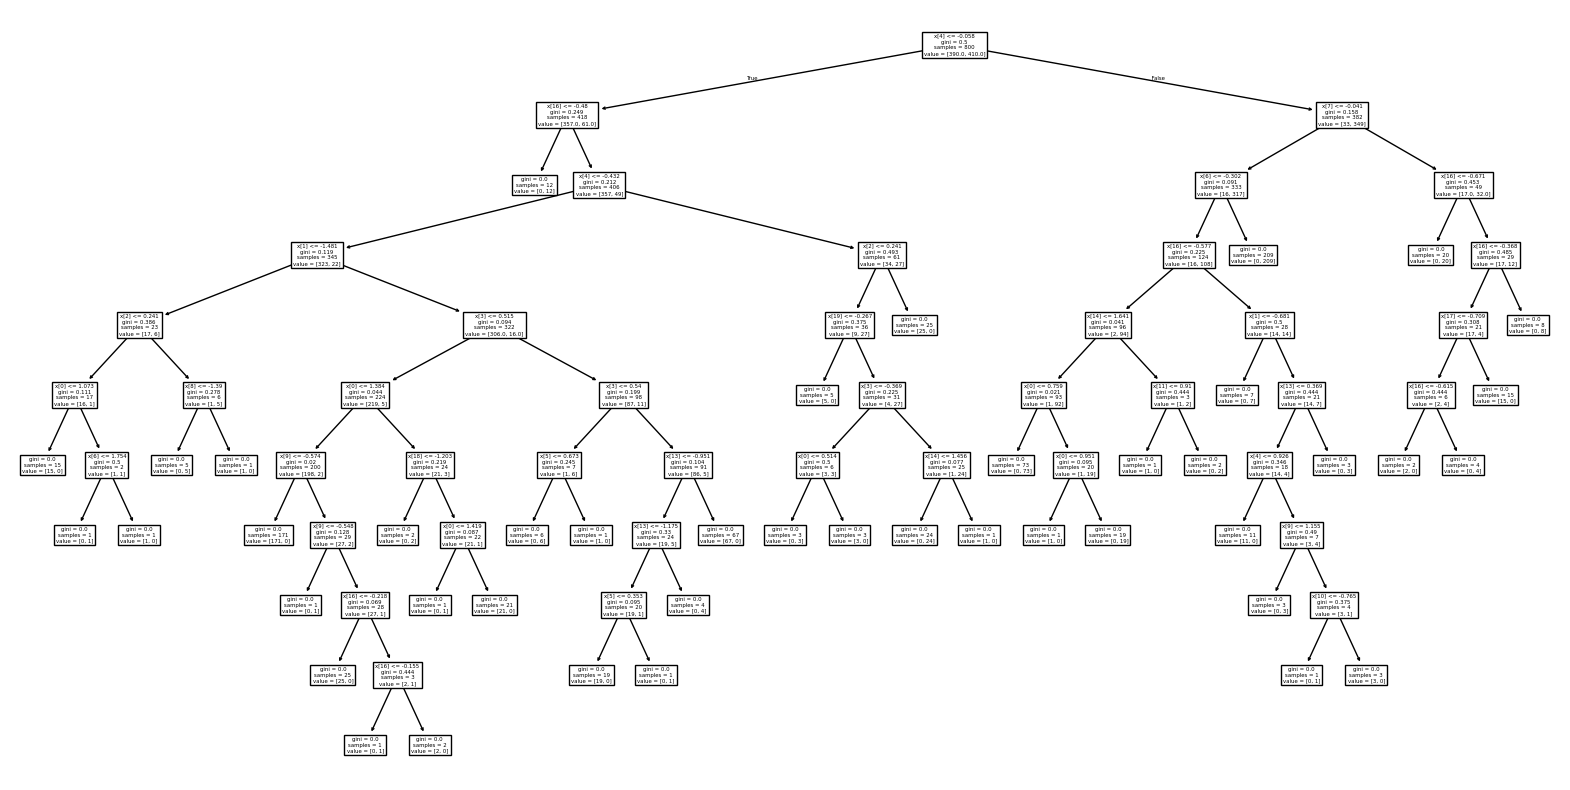

In [13]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(dt1)

In [14]:
from sklearn.metrics import accuracy_score
print()

In [15]:
test1=np.array(df.iloc[3,:-1]).reshape(1,20)
print(dt1.predict(test1))
print(dt2.predict(test1))
print(dt3.predict(test1))




[1]
[1]


C:\Users\far\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\far\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\far\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


ValueError: X has 20 features, but DecisionTreeClassifier is expecting 16 features as input.